In [1]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

Saving fruit_image.jpg to fruit_image (1).jpg


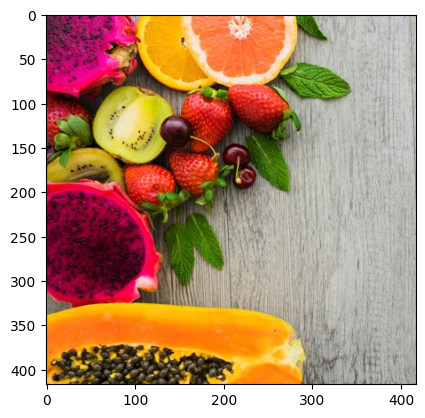

In [3]:
# Step 1: Upload image
uploaded = files.upload()
img_path = next(iter(uploaded))
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

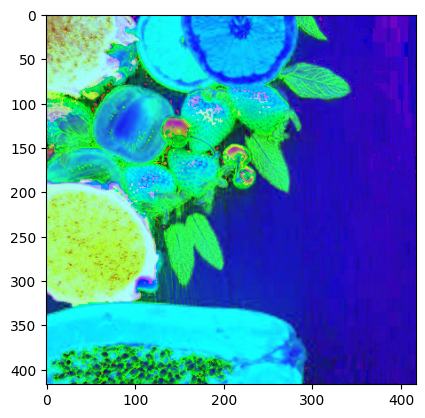

In [4]:
# Step 2: Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)

In [5]:
# Step 3: Define threshold values for a specific color range (e.g., red)
# Note: HSV ranges are: H: 0-179, S: 0-255, V: 0-255
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv_image, lower_red, upper_red)

lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)

# Combine both masks for red detection
red_mask = mask1 + mask2

In [6]:
# Step 4: Apply mask on original image
result_image = cv2.bitwise_and(image_rgb, image_rgb, mask=red_mask)

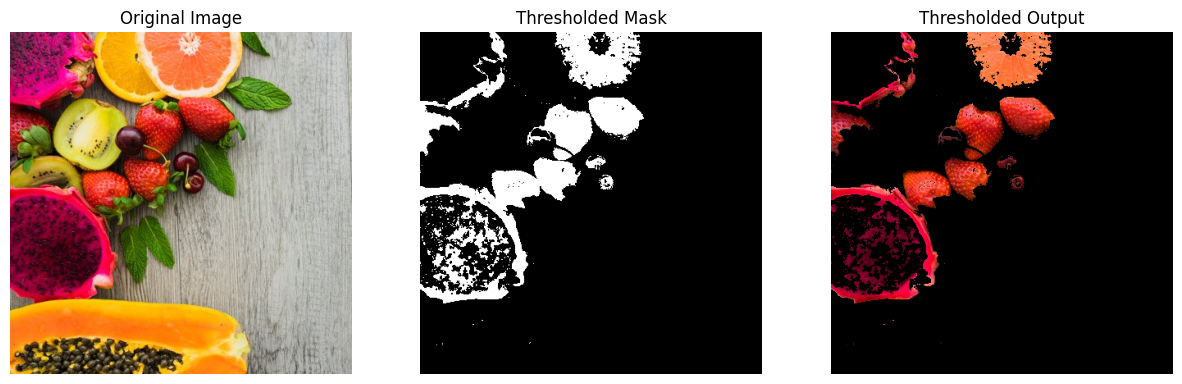

In [7]:
# Step 5: Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(red_mask, cmap='gray')
plt.title("Thresholded Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_image)
plt.title("Thresholded Output")
plt.axis('off')

plt.show()

 Extended Experiment: Interactive Color Thresholding using Trackbars in Google Colab


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from ipywidgets import interact, IntSlider
from IPython.display import display

Saving fruit_image.jpg to fruit_image (4).jpg


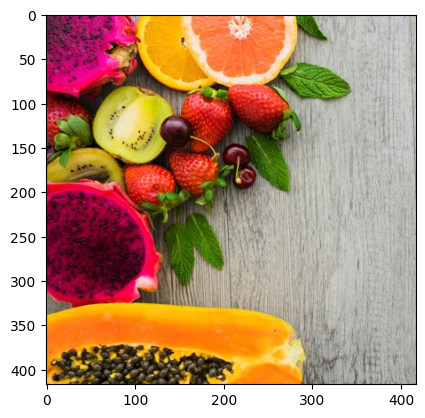

In [13]:
# Step 1: Upload image
uploaded = files.upload()
img_path = next(iter(uploaded))
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image_rgb)


In [14]:
# Step 2: Interactive thresholding function
def threshold_image(h_min, s_min, v_min, h_max, s_max, v_max):
    lower_bound = np.array([h_min, s_min, v_min])
    upper_bound = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
    result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.title("Filtered Output")
    plt.axis('off')
    plt.show()

In [15]:
# Step 3: Create interactive sliders
interact(threshold_image,
         h_min=IntSlider(min=0, max=179, step=1, value=0, description='H Min'),
         s_min=IntSlider(min=0, max=255, step=1, value=100, description='S Min'),
         v_min=IntSlider(min=0, max=255, step=1, value=100, description='V Min'),
         h_max=IntSlider(min=0, max=179, step=1, value=179, description='H Max'),
         s_max=IntSlider(min=0, max=255, step=1, value=255, description='S Max'),
         v_max=IntSlider(min=0, max=255, step=1, value=255, description='V Max'));

interactive(children=(IntSlider(value=0, description='H Min', max=179), IntSlider(value=100, description='S Mi…